In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
df = pd.read_csv('dados_sinteticos_com_erros_atualizado.csv')

In [28]:
df.head()

id        data      hora            cliente                 produto  \
0   1  2017-09-20  08:12:57        Filipe Cruz     Isotônico Coca-Cola   
1   2  2019-07-17  18:26:47       Daniel Silva  Lembrancinha Festa Box   
2   3  2018-01-20  15:55:07       Victor Silva          Convite Piffer   
3   4  2016-06-21  11:36:07  Vanessa Rodrigues          Vinho Heineken   
4   5  2015-05-01  18:08:24      Luiz Bandeira            Chinelo Fila   

   valor_x  quantidade       total        status  cidade  ...      cor  \
0    96.87           7   38.092982  em separação  Cidade  ...      NaN   
1    92.21           7  123.142236   em trânsito  Cidade  ...      NaN   
2   170.19           5   37.268889     cancelado  Cidade  ...      NaN   
3   151.80          10   15.517708      entregue  Cidade  ...      NaN   
4    82.24           7  326.226314  em separação  Cidade  ...  amarelo   

  tamanho   peso  altura largura comprimento          categoria_y    valor_y  \
0          83.75   12.89   35.11       56.99              bebidas   5.441855   
1          60.02   54.85   15.35       41.05  artigos para festas  17.591748   
2          20.81   20.38   75.42       46.84  artigos para festas   7.453778   
3          44.59    4.68   32.67       91.61              bebidas   1.551771   
4          92.52   57.52   33.77       49.21             calçados  46.603759   

             categoria      valor  
0              bebidas   5.441855  
1  artigos para festas  17.591748  
2  artigos para festas   7.453778  
3              bebidas   1.551771  
4             calçados  46.603759  

[5 rows x 29 columns]

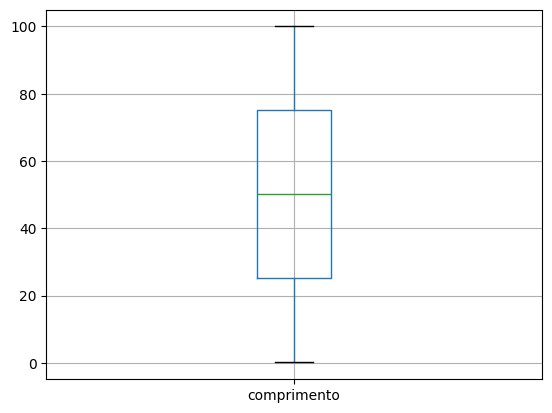

In [29]:
df.boxplot(column='comprimento')
plt.show()

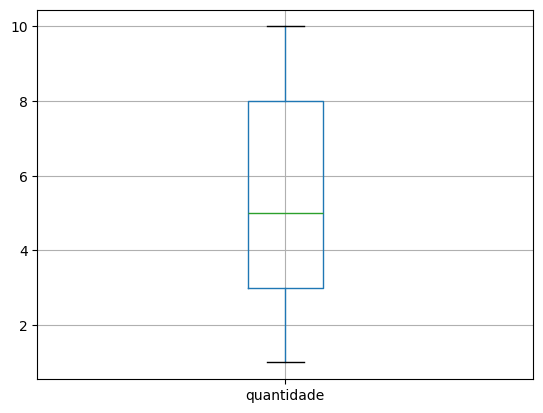

In [30]:
df.boxplot(column='quantidade')
plt.show()

In [31]:
df.isnull().sum()

id                  0
data                0
hora                0
cliente             0
produto             0
valor_x             0
quantidade          0
total               0
status              0
cidade              0
estado              0
pais                0
cep                 0
frete               0
pagamento           0
vendedor            0
categoria_x         0
marca               0
modelo              0
cor            160226
tamanho             0
peso                0
altura              0
largura             0
comprimento         0
categoria_y         0
valor_y             0
categoria           0
valor               0
dtype: int64

In [32]:
print(df[df.isnull().any(axis=1)])

           id        data      hora            cliente  \
0           1  2017-09-20  08:12:57        Filipe Cruz   
1           2  2019-07-17  18:26:47       Daniel Silva   
2           3  2018-01-20  15:55:07       Victor Silva   
3           4  2016-06-21  11:36:07  Vanessa Rodrigues   
5           6  2015-09-23  14:54:22    Maycon Demarque   
...       ...         ...       ...                ...   
214306  50000  2018-04-27  17:47:14       Pedro Soares   
214307  50000  2018-04-27  17:47:14       Pedro Soares   
214308  50000  2018-04-27  17:47:14       Pedro Soares   
214309  50000  2018-04-27  17:47:14       Pedro Soares   
214310  50000  2018-04-27  17:47:14       Pedro Soares   

                       produto  valor_x  quantidade       total        status  \
0          Isotônico Coca-Cola    96.87           7   38.092982  em separação   
1       Lembrancinha Festa Box    92.21           7  123.142236   em trânsito   
2               Convite Piffer   170.19           5   37.268

In [33]:
indices_for_replace = df['pais'] != 'Brasil'
df.loc[indices_for_replace, 'estado'] = "não se aplica"
casos_diferentes_brasil = df[df['pais'] != 'Brasil'].head(5)

In [34]:
casos_diferentes_brasil = casos_diferentes_brasil[['cliente', 'cidade', 'estado', 'pais']]
print(casos_diferentes_brasil)

           cliente  cidade         estado   pais
7   Gustavo Soares  Cidade  não se aplica  Chile
8   Gustavo Soares  Cidade  não se aplica  Chile
9   Gustavo Soares  Cidade  não se aplica  Chile
10  Gustavo Soares  Cidade  não se aplica  Chile
11  Gustavo Soares  Cidade  não se aplica  Chile


In [35]:
df = df.drop(columns=['cidade'])

In [36]:
df[df['cliente'].str.contains('^Daniel Cardoso', na=False)]

id        data      hora         cliente          produto  valor_x  \
2055      467  2017-02-07  18:43:11  Daniel Cardoso      Câmera Sony   244.07   
2056      467  2017-02-07  18:43:11  Daniel Cardoso      Câmera Sony   244.07   
2057      467  2017-02-07  18:43:11  Daniel Cardoso      Câmera Sony   244.07   
2058      467  2017-02-07  18:43:11  Daniel Cardoso      Câmera Sony   244.07   
2059      467  2017-02-07  18:43:11  Daniel Cardoso      Câmera Sony   244.07   
...       ...         ...       ...             ...              ...      ...   
213102  49727  2018-08-17  22:43:34  Daniel Cardoso  Desktop Samsung   131.25   
213103  49727  2018-08-17  22:43:34  Daniel Cardoso  Desktop Samsung   131.25   
213104  49727  2018-08-17  22:43:34  Daniel Cardoso  Desktop Samsung   131.25   
213105  49727  2018-08-17  22:43:34  Daniel Cardoso  Desktop Samsung   131.25   
213106  49727  2018-08-17  22:43:34  Daniel Cardoso  Desktop Samsung   131.25   

        quantidade        total       status estado  ...     cor  tamanho  \
2055             4   746.321498     entregue     RR  ...   verde            
2056             4  2150.178725     entregue     RR  ...   verde            
2057             4   746.321498     entregue     RR  ...   verde            
2058             4  2150.178725     entregue     RR  ...   verde            
2059             4   746.321498     entregue     RR  ...   verde            
...            ...          ...          ...    ...  ...     ...      ...   
213102          10  1930.545183  em trânsito     MA  ...  branco            
213103          10  8204.862338  em trânsito     MA  ...  branco            
213104          10  1930.545183  em trânsito     MA  ...  branco            
213105          10  8204.862338  em trânsito     MA  ...  branco            
213106          10  1930.545183  em trânsito     MA  ...  branco            

         peso altura largura comprimento  categoria_y     valor_y  \
2055    95.09   9.72   76.06       86.77  eletrônicos  186.580374   
2056    95.09   9.72   76.06       86.77  eletrônicos  186.580374   
2057    95.09   9.72   76.06       86.77  eletrônicos  186.580374   
2058    95.09   9.72   76.06       86.77  eletrônicos  186.580374   
2059    95.09   9.72   76.06       86.77  informática  537.544681   
...       ...    ...     ...         ...          ...         ...   
213102  69.15  84.90   66.59       24.84  informática  820.486234   
213103  69.15  84.90   66.59       24.84  eletrônicos  193.054518   
213104  69.15  84.90   66.59       24.84  eletrônicos  193.054518   
213105  69.15  84.90   66.59       24.84  eletrônicos  193.054518   
213106  69.15  84.90   66.59       24.84  eletrônicos  193.054518   

          categoria       valor  
2055    eletrônicos  186.580374  
2056    eletrônicos  537.544681  
2057    informática  186.580374  
2058    informática  537.544681  
2059    eletrônicos  186.580374  
...             ...         ...  
213102  eletrônicos  193.054518  
213103  informática  820.486234  
213104  informática  193.054518  
213105  eletrônicos  820.486234  
213106  eletrônicos  193.054518  

[919 rows x 28 columns]

In [37]:
duplicatas = df[df.duplicated(subset=['hora', 'cliente'], keep=False)]

if len(duplicatas) > 0:
    print("Registros duplicados encontrados:")
    print(duplicatas)
else:
    print("Não foram encontrados registros duplicados com o mesmo valor na coluna 'horario' e 'nome'.")

Registros duplicados encontrados:
           id        data      hora         cliente            produto  \
7           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
8           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
9           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
10          8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
11          8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
...       ...         ...       ...             ...                ...   
214306  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214307  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214308  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214309  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214310  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   

        valor_x  quantidade        total                status         estado

In [38]:
df = df.drop_duplicates(subset=['hora', 'cliente'], keep='first')

In [39]:
if len(duplicatas) > 0:
    print("Registros duplicados encontrados:")
    print(duplicatas)
else:
    print("Não foram encontrados registros duplicados com o mesmo valor na coluna 'horario' e 'nome'.")

Registros duplicados encontrados:
           id        data      hora         cliente            produto  \
7           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
8           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
9           8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
10          8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
11          8  2017-06-04  19:48:51  Gustavo Soares      Impressora LG   
...       ...         ...       ...             ...                ...   
214306  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214307  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214308  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214309  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   
214310  50000  2018-04-27  17:47:14    Pedro Soares  Raquete Olympikus   

        valor_x  quantidade        total                status         estado

In [40]:
df_vendas_por_estado = df.groupby('estado').agg({'id': 'count','total': ['sum', 'mean', 'max', 'min']})
df_vendas_por_estado

id         total                                   
              count           sum        mean          max       min
estado                                                              
AC             1825  1.219146e+06  668.025093  9437.170441  1.348454
AL             1733  1.159492e+06  669.066311  9525.066741  1.150444
AM             1715  1.154843e+06  673.378105  8769.643499  1.150444
AP             1825  1.223938e+06  670.651065  9437.170441  1.145304
BA             1780  1.166084e+06  655.103396  9525.066741  1.399516
CE             1729  1.171269e+06  677.425918  9437.170441  1.921561
DF             1769  1.167994e+06  660.256703  8493.453397  1.145304
ES             1720  1.270796e+06  738.834880  8769.643499  1.150444
GO             1802  1.137167e+06  631.058233  9178.043146  1.551771
MA             1772  1.218671e+06  687.737663  9178.043146  1.551771
MG             1682  1.156895e+06  687.809109  8856.362701  1.150444
MS             1762  1.216767e+06  690.559889  9437.170441  1.150444
MT             1742  1.159320e+06  665.510816  8837.365540  1.399516
PA             1728  1.182337e+06  684.222625  9178.043146  1.145304
PB             1742  1.031090e+06  591.900132  8729.049992  1.921561
PE             1766  1.253064e+06  709.549543  9525.066741  2.290608
PI             1767  1.228943e+06  695.497107  9195.674994  1.145304
PR             1773  1.212043e+06  683.611542  9178.043146  1.150444
RJ             1799  1.237964e+06  688.140270  9178.043146  1.150444
RN             1708  1.172206e+06  686.303048  8856.362701  1.150444
RO             1748  1.170960e+06  669.885790  8837.365540  1.348454
RR             1742  1.157696e+06  664.578427  9195.674994  1.150444
RS             1702  1.098916e+06  645.661741  8837.365540  1.399516
SC             1780  1.240657e+06  696.998071  9525.066741  1.436607
SE             1753  1.251552e+06  713.948569  9525.066741  1.150444
SP             1729  1.192369e+06  689.629339  9437.170441  1.551771
TO             1820  1.213097e+06  666.536682  9525.066741  1.399516
não se aplica  2492  1.681344e+06  674.696796  9525.066741  1.150444

In [43]:
df[['pagamento', 'total']].groupby('pagamento').mean('total')

total
pagamento                
boleto         666.288274
cartão         677.818532
cheque         676.700314
transferência  683.930028